# Computer Science and Data Analytic's
# Fundamentals of Data Analysis 
# Project 2020
## By: Keith Brazill - G00387845

*This assignement is submitted as part of the requirements for partial fullfilment of a postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.*

![alt text.](https://learnonline.gmit.ie/pluginfile.php/1/theme_adaptable/logo/1606983803/Transparent%20new.png "GMIT Logo")

<br>

# 1. Introduction

This notebook is prepared in response to the brief assigned for the project 2020 in the module of Fundamentals of Data Analysis 2020 as part of the postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.

This notebook is structured as follow's:

1. Introduction
2. The Project Brief
3. The Project Dataset  
4. Simple Linear Regression
5. Other forms of Regression
**Possibly machine learning**
6. Conclusion
7. References

To approach to this project will be firstly to examine the provided dataset via some simple statistical tables and graphs and then carry out simple linear regression on this dataset. Following application of the simple linear regression we will explain, analyse and determine accuracy of our regression. Finally we will review other forms of regression and compare these to our simple linear regression.

Throughout the notebook each of the above sections is cleary explained using a combination of code and markdown cells.

**Packages used in this project**

The following python packages were used in this assignment to carry out the required the project brief:

* Python https://www.python.org/downloads/
* Numpy http://www.numpy.org/ - The fundamental package for scientific computing with Python.
* Jupyter Notebook https://jupyter.org/ - Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages.
* matplotlib.pyplot https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html - matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.
* seaborn https://seaborn.pydata.org/ - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* pandas https://pandas.pydata.org/ - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language

<br>

# 2. The Project Brief

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

<br>

# 3. The Project Dataset

Before we begin with our regression modelling, it would be good practice to first have a look at our provided dataset and try and understand some of the patterns in the dataset. Let's first begin by reading the provided csv file with pandas below.

In [4]:
import pandas as pd # We import pandas so we can read our csv files.
import matplotlib.pyplot as plt 
%matplotlib inline 
# Make matplotlib show interactive plots in the notebook.

powerproduction = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', sep=',')
# define powerproduction = pandas read csv file with comma seperated delimiter
powerproduction # print out to screen

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [5]:
powerproduction.describe() # prints out a summary of key statistics of dataset

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We can see from our 2 tables above that there are 500 measurements for speed (wind speed km/h) and power (Output Energy, assume dto be kWh) corresponding to the wind speed. The mean wind speed is 12.5 km/h and the mean power is 48 kWh. Our minimum wind speed is 0  and max is 25. Our minimum power is 0 and maximum is 113. We have a standard deviation of ~7.22 on wind speed and ~41.61 on our power, therefore we expect some fluctuation from mean on wind speed and a high degree of fluctuation on the power output from the mean values. 

Wind power is generated by the force wind exerts on the blades of a turbine, causing the turbine's shaft to rotate at a speed of 10 to 20 revolutions per minute (rpm). The rotor shaft is connected to a generator that converts mechanical energy into electrical energy.

Following research online at;
* http://www.hydroquebec.com/learning/eolienne/#:~:text=Wind%20turbines%20require%3A,be%20stopped%20to%20avoid%20damagethe 

We found out the energy produced from a wind turbine is primarily affected by wind speed. Also, the minimum wind speed required for a wind turbine to start turning and generating electricity is 12-14 km/h. It was also noted that at high wind speeds the wind turbine can shut off to prevent damage to the turbine.

Following production of our tables above and some research, lets now visualise our data set in a scatter plot using code below.

Text(0.5, 1.0, 'Wind Energy')

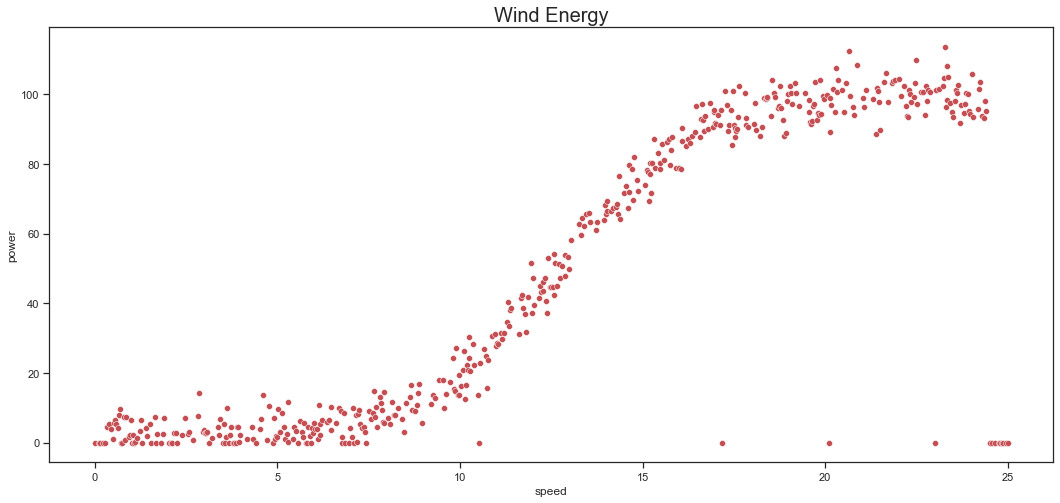

In [6]:
import matplotlib.pyplot as plt # imports matplotlib.pyplot as plt
import seaborn as sns # imports seaborn as sns
plt.rcParams["figure.figsize"] = (18,8) #sets the plots size
sns.set_theme(style="ticks") # user preferred style for sns plots

WindEnergy = sns.scatterplot(x="speed", y="power", data=powerproduction[0:], color='r')
# Creates a scatterplot with x, y and data inputs from row 0, color red. 
plt.title('Wind Energy', fontsize=20) # plots title with user defined fontsize

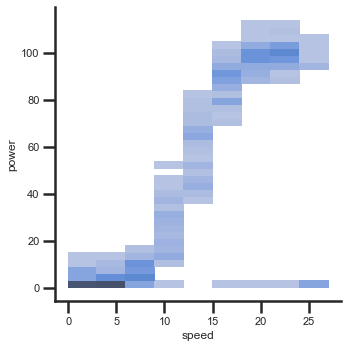

In [7]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
# changes the size of the text using the font_scale parameter for sns.set_context()
# to also change the line width so it matches. We do this with the rc parameter

WindEnergyDisplot = sns.displot(powerproduction, x="speed", y="power", binwidth=3)
# Creates a displot using seaborn with data, x, y inputs and binwidth set to 3 to group figures
WindEnergyDisplot # prints to screen

We can see from out output scatter and displot that the power output is generally low until it reaches around 12km/h (or close to mean wind speed) and then it keeps rising until it hits maximum output at about 90kWh withint he wind speeds range from ~17km/h to ~25km/h. It is also noted that at the maximum wind speed there are a number of 0 measurements for power, this seems to relate to our research and that the wind turbine has cut out for safety reasons. There are also a number of outliers on the lower end of the scale, this may relate to other technical reasons the turbine may have cut out or perhaps due to changes in wind direction. 

Having imported and briefly analysed our dataset, we are now ready to move onto our next task and apply simple linear regression to the dataset.

<br>

# 3. Simple Linear Regression



Simple linear regression is a method of modelling a relationshop between two variables by fitting a straight line (linear equation) to the measured data. One variable is considered to be an explanatory variable (in our case power output) and the other is considered to be a dependent variable (the wind speed). 

Linear regression informs us the value of one variable based on the input of another, i.e. power output at given wind speed. In the field of data analysis, for machine learning it is one of the most simplest models to try out on a data set. If it is foreseen that there is likely a straight line trend in the data, simple linear regression can provide efficient and reasonably accurate results. 

Before we carry out simple linear regression on our dataset, it is important to understand that not all datasets follow a linear trend. Going back to our power dataset and research in wind energy engineering, we know at a certain output the wind turbine may power off and therefore the dataset may become exponential at this range. This will be explored further in section 4 of this notebook. 

For the following section of this notebook using a combination of code an markdown cells, we will follow the below methodology for simple linear regression:

1. Plot our variables on x-axis (speed) and y-axis (power)
2. Plot a straight line using mathematical equation
3. Plot a straight line using Numpy Polyfit build in function

**Extrapolate line**



In [11]:
s = powerproduction['speed']
p = powerproduction ['power']
s, p

(0       0.000
 1       0.125
 2       0.150
 3       0.225
 4       0.275
         ...  
 495    24.775
 496    24.850
 497    24.875
 498    24.950
 499    25.000
 Name: speed, Length: 500, dtype: float64,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 495    0.0
 496    0.0
 497    0.0
 498    0.0
 499    0.0
 Name: power, Length: 500, dtype: float64)

In [12]:
# Calculate the best values for m and c.

import numpy as np

# First calculate the means (a.k.a. averages) of s and p.
s_avg = np.mean(s)
p_avg = np.mean(p)

# Subtract means from s and p.
s_zero = s - s_avg
p_zero = p - p_avg

# The best m is found by the following calculation.
m = np.sum(s_zero * p_zero) / np.sum(s_zero * s_zero)
# Use m from above to calculate the best c.
c = p_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


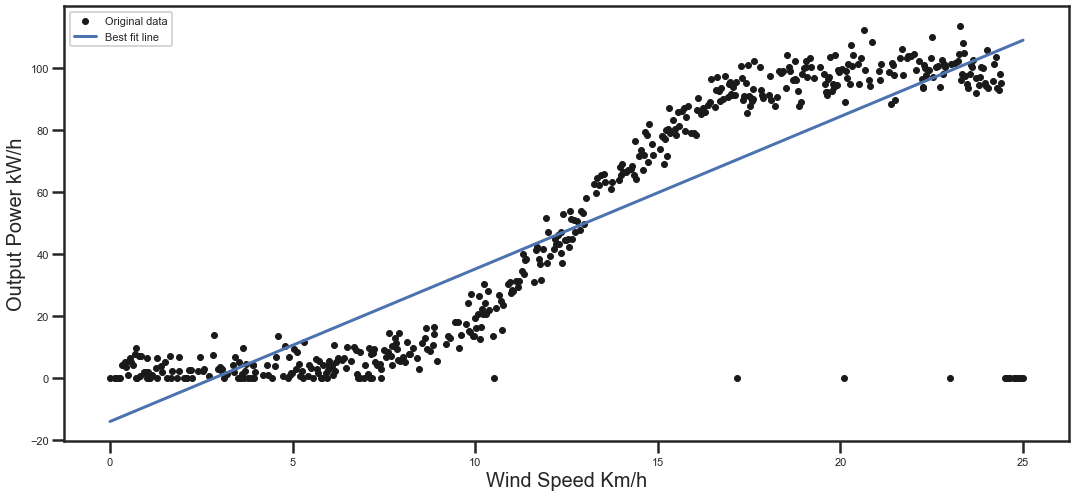

In [18]:
# Plot the best fit line.
plt.plot(s, p, 'k.', label='Original data')
plt.plot(s, m * s + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Wind Speed Km/h', fontsize=20)
plt.ylabel('Output Power kW/h', fontsize=20)
plt.legend()

# Show the plot.
plt.show()

In [28]:
np.polyfit(s, p, 1)

array([  4.91759567, -13.89990263])

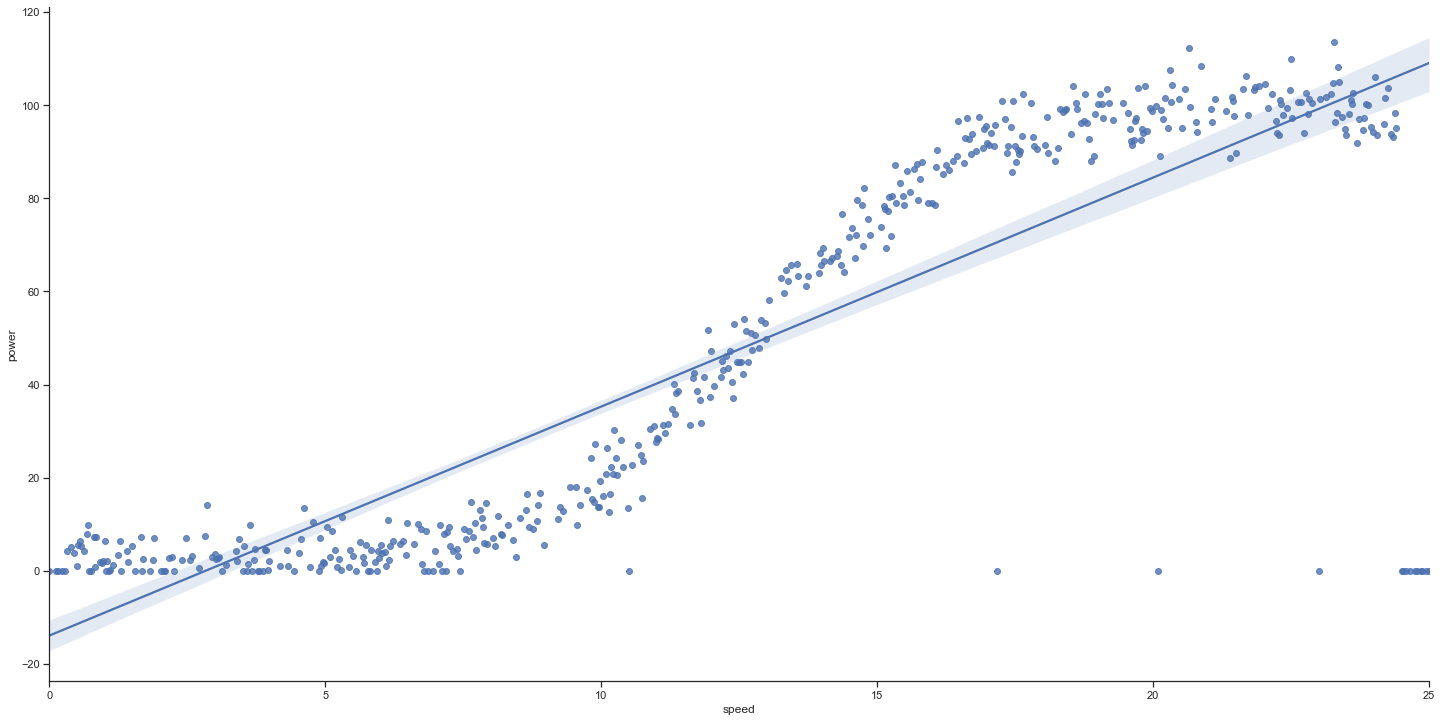

In [27]:
import seaborn as sns
sns.lmplot(x="speed", y="power", data=powerproduction, height=10, aspect=2)
plt.show()




numpy.polyfit for coeffs

coeffs = np.polyfit(DailyCovidCases, DailyEnergy2020, 1) # we want coefficient for y-x relationship at value 1 in the data
coeffs # displays coefficient array below

The output for the coefficients are -5.76440416e-03, 6.92192099e+01. Knowing the x coefficients allows the y values to be calculated if we say:

a = -5.76440416e-03
b = 6.92192099e+01
and use the formula:

𝑦=𝑎∗𝑥+𝑏 
Having presented our real life data and briefly summarised key statistics of the datasets, we will now look to create our synthesised datasets based on our real life data.

# References

http://www.hydroquebec.com/learning/eolienne/#:~:text=Wind%20turbines%20require%3A,be%20stopped%20to%20avoid%20damage
https://seaborn.pydata.org/tutorial/distributions.html
https://www.codecademy.com/articles/seaborn-design-i#:~:text=Seaborn%20has%20five%20built%2Din,name%20of%20it%20to%20sns.
https://towardsdatascience.com/laymans-introduction-to-linear-regression-8b334a3dab09#:~:text=Linear%20regression%20attempts%20to%20model,variable%20(e.g.%20your%20expenses).
